In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
%matplotlib inline

## Introduction to Clustering

Often, the data you encounter in the real world won’t have flags attached and won’t provide labeled answers to your question. Finding patterns in this type of data, unlabeled data, is a common theme in many machine learning applications. Unsupervised Learning is how we find patterns and structure in these data.

`Clustering` is the most well-known unsupervised learning technique. It finds structure in unlabeled data by identifying similar groups, or clusters. Examples of clustering applications are:

* `Recommendation engines`: group products to personalize the user experience
* `Search engines`: group news topics and search results
* `Market segmentation`: group customers based on geography, demography, and behaviors
* `Image segmentation`: medical imaging or road scene segmentation on self-driving cars

### K-Means Clustering

The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. 

So two questions arise:
* many groups do we choose?
* How do we define similarity?


* $K-Means$ * is the most popular and well-known clustering algorithm, and it tries to address these two questions.
  * The “K” refers to the number of clusters (groups) we expect to find in a dataset.
  * The “Means” refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize.

* It is an iterative approach:
 * Place k random centroids for the initial clusters.
 * Assign data samples to the nearest centroid.
 * Update centroids based on the above-assigned data samples.
 
Repeat Steps 2 and 3 until convergence (when points don’t move between clusters and centroids stabilize).

Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster.

In [3]:
from sklearn import  datasets
iris = datasets.load_iris()

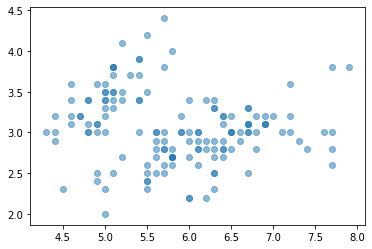

In [4]:
#### Q 1
# Store iris.data
samples = iris.data
# Create x and y
x = samples[:,0]
y = samples[:,1]
# Plot x and y
plt.scatter(x, y, alpha = 0.5)
# Show the plot
plt.show()

## Implementing K-Means: Step 1
* The K-Means algorithm:

* 1 Place k random centroids for the initial clusters.
* 2 Assign data samples to the nearest centroid.
* 3 Update centroids based on the above-assigned data samples.

Repeat Steps 2 and 3 until convergence.

Because we expect there to be three clusters (for the three species of flowers), let’s implement K-Means where the k is 3.



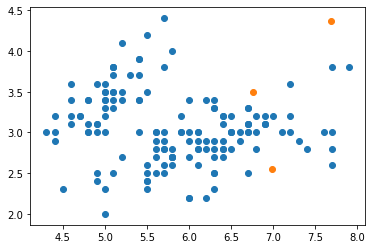

In [5]:
## Using the NumPy library, we will create 3 random initial centroids and plot them along with our samples.


x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Number of clusters
k = 3
# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), size = k)
# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), size = k)
# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))
# Make a scatter plot of x, y
plt.scatter(x, y)
# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y )
# Display plot
plt.show()

## Implementing K-Means: Step 2

The K-Means algorithm:

* 1 Place k random centroids for the initial clusters.
* 2 Assign data samples to the nearest centroid.
* 3 Update centroids based on the above-assigned data samples.

Repeat Steps 2 and 3 until convergence.

Now we have the 3 random centroids. Let’s assign data points to their nearest centroids.

To do this we’re going to use the Distance Formula to write a distance() function. Then, we are going to iterate through our data samples and compute the distance from each data point to each of the 3 centroids.

Suppose we have a point and a list of three distances in distances and it looks like [15, 20, 5], then we would want to assign the data point to the 3rd centroid. The argmin(distances) would return the index of the lowest corresponding distance, 2, because the index 2 contains the minimum value.

In [6]:
## Write a distance() function.

# It should be able to take in a and b and return the distance between the two points.

def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one+two) ** 0.5
    return distance

#### Q4
Create an array called labels that will hold the cluster labels for each data point. Its size should be the length of the data sample.

It should look something like:[ 0.  0.  0.  0.  0.  0.  ...  0.]
Create an array called distances that will hold the distances for each centroid. It should have the size of k.

It should look something like:[ 0.  0.  0.]

In [7]:
labels = np.zeros(len(x))
distances = np.zeros((k))

### Q5

To assign each data point to the closest centroid, we need to iterate through the whole data sample and calculate each data point’s distance to each centroid.

We can get the index of the smallest distance of distances by doing:

cluster = np.argmin(distances)

Then, assign the cluster to each index of the labels array.

In [8]:
# Assign to the closest centroid

for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

## Then, print labels (outside of the for loop).

In [9]:
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 2. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1.]


## Implementing K-Means: Step 3
Update centroids based on the above-assigned data samples.

Find new cluster centers by taking the average of the assigned points. To find the average of the assigned points, we can use the .mean() function.

In [11]:
#### Q1
# Save the old centroids value before updating.

# We have already imported deepcopy for you:
    
from copy import deepcopy

In [13]:
centroids_old = deepcopy(centroids)

### Q3
Then, create a for loop that iterates k times.

Since k = 3, as we are iterating through the forloop each time, we can calculate mean of the points that have the same cluster label.

Inside the for loop, create an array named points where we get all the data points that have the cluster label i.

There are two ways to do this, check the hints to see both!

In [16]:
for i in range(k):
    points = []
    for j in range(len(sepal_length_width)):
        if labels[j] == i:
            points.append(sepal_length_width[j])

#### Q4
Then (still inside the for loop), calculate the mean of those points using .mean() to get the new centroid.

Store the new centroid in centroids[i].

The .mean() fucntion looks like:

In [19]:
for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

In [20]:
print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

[[6.98658851 2.54516989]
 [6.75831758 3.49929454]
 [7.68597721 4.37268443]]
- - - - - - - - - - - - - -
[[6.148      2.626     ]
 [5.64795918 3.2622449 ]
 [7.8        3.8       ]]


#### This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

We can do this using a while loop. And everything from Step 2 and 3 goes inside the loop.

For the condition of the while loop, we need to create an array named errors. In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).

The loop ends when all three values in errors are 0.

#### Q1 Initialize error

Then, use the distance() function to calculate the distance between the updated centroid and the old centroid and put them in error:


In [22]:
error = np.zeros(3)

error[0] = distance(centroids[0], centroids_old[0])

#### Q2 After that, add a while loop:
And move everything below (from Step 2 and 3) inside.

And recalculate error again at the end of each iteration of the while loop:

In [24]:
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1],   centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

In [ ]:
  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1],   centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

#### Q4 
Awesome, now you have everything, let’s visualize it.

After the while loop finishes, let’s create an array of colors:

colors = ['r', 'g', 'b']

Then, create a for loop that iterates k times.

Inside the for loop (similar to what we did in the last exercise), create an array named points where we get all the data points that have the cluster label i.

Then we are going to make a scatter plot of points[:, 0] vs points[:, 1] using the scatter() function:

Then, paste the following code at the very end. Here, we are visualizing all the points in each of the labels a different color.

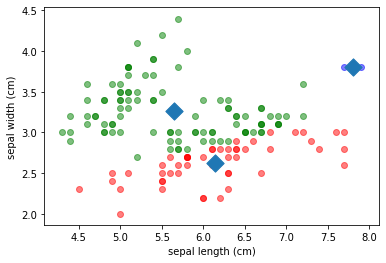

In [25]:
colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()